# NBA Shot Predictions

The NBA has undergone something of a revolution in recent years, with teams moving from shooting predominantly 2-point shots, to putting heavier emphasis on longer range, 3-point shooting. This was the result of analysis undertaken at a number of teams demonstrating that the additional point on offer from longer distance was sufficient to outweight the reduction in shooting accuracy from this range.

I thought it would be interesting to see if we could create a model to prove this point, using the *Lakers* dataset available in R's **Lubridate** package. This contains around 35,000 data points from NBA games featuring the Los Angeles Lakers in the 2008-2009 season, including over 13,000 shots. In this notebook, I will do some preliminary analysis of the dataset, and then look to build a logistic regression model to predict shot accuracy. I'll then analyse the key players on the Lakers team, to see how they perform compared to the average player in terms of shooting ability.

To begin with, let's load the packages required for this analysis, and load the *Lakers* dataset to a dataframe

In [4]:
library(tidyverse)
library(lubridate)
library(caTools)
library(RColorBrewer)

In [7]:
df1=lakers
head(df1)

date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
20081028,POR,home,12:00,1,jump ball,OFF,,,0,,NA,NA
20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23,13
20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,,0,off,NA,NA
20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25,6
20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,,0,off,NA,NA
20081028,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25,10


We can see here that our dataset includes play-by-play data for each game, showing the team in possession, the action type, and the player involved. For shot actions, we can see the type of shot, the result (made or missed), and the location on the floor that the shot was taken from.

Given we're only interested in analysing shots in this project, we'll limit out dataset to shot actions only:

In [22]:
shots=df1%>%
  filter(etype=="shot")
head(shots,5)

date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23,13
20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25,6
20081028,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25,10
20081028,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36,21
20081028,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30,21


Now, we have 13,000 shots in our dataset here, so it might be useful to look at key performance stats for LA Lakers players. Let's look at shooting accuracy for the 10 Lakers with the most shots in the season...

In [10]:
Key_Lakers=shots%>%
  filter(team=="LAL")%>%
  group_by(player)%>%
  summarise(TotalShots=n(),
            ShotsMade=sum(result=="made"),
            ShootingPerc=round(ShotsMade/TotalShots,2))%>%
  arrange(desc(TotalShots))%>%
  head(10)

Key_Lakers

player,TotalShots,ShotsMade,ShootingPerc
Kobe Bryant,1619,757,0.47
Pau Gasol,993,570,0.57
Lamar Odom,665,332,0.50
Derek Fisher,646,267,0.41
Trevor Ariza,578,266,0.46
Andrew Bynum,466,259,0.56
Jordan Farmar,389,153,0.39
Sasha Vujacic,375,144,0.38
Luke Walton,289,128,0.44
Josh Powell,228,102,0.45


Wow! Kobe Bryant was shooting almost twice as frequently as the next most common shot-taker, Pau Gasol. And he was also pretty accurate - only 3 Lakers have higher shooting percentages.

Next, lets visualise the locations from which these players were shooting. Note, the court dimensions are approximations, so may not be perfectly to scale.

Warning message:
“Removed 13 rows containing missing values (geom_point).”

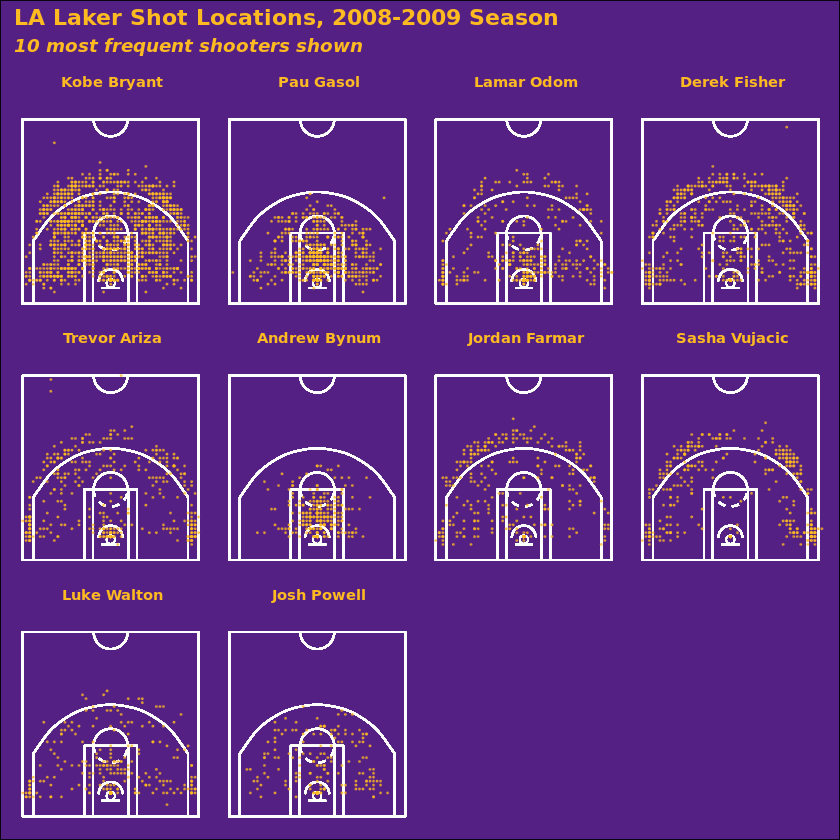

In [40]:
laker_purple="#552084"
laker_yellow="#FDBA21"
laker_white="#FFFFFF"
laker_black="#000000"

shots%>%
  filter(player %in% Key_Lakers$player)%>%
  ggplot(aes(x,y))+
  theme_minimal()+
  geom_segment(aes(x=3,xend=3,y=0,yend=16),col=laker_white,size=0.5)+
  geom_segment(aes(x=47,xend=47,y=0,yend=16),col=laker_white,size=0.5)+
  geom_curve(aes(x=3,xend=47,y=16,yend=16),col=laker_white,size=0.5,curvature = -0.65)+
  geom_rect(aes(xmin=17.5,xmax=32.5,ymin=0,ymax=18),col=laker_white,size=0.5,alpha=0)+
  geom_segment(aes(x=0,xend=50,y=0,yend=0),col=laker_white,size=0.5)+
  geom_curve(aes(x=20,xend=30,y=18,yend=18),col=laker_white,size=0.5,curvature=-1)+
  geom_curve(aes(x=20,xend=30,y=18,yend=18),col=laker_white,size=0.5,curvature=1,linetype="dashed")+
  geom_point(aes(x=25,y=5.25),shape=21,size=2,col=laker_white,stroke=0.5)+
  geom_segment(aes(x=22.5,xend=27.5,y=4,yend=4),col=laker_white,size=0.5)+
  geom_curve(aes(x=21.5,xend=28.5,y=5.75,yend=5.75),col=laker_white,size=0.5,curvature=-1)+
  geom_rect(aes(xmin=20,xmax=30,ymin=0,ymax=18),col=laker_white,size=0.5,alpha=0)+
  geom_rect(aes(xmin=0,xmax=50,ymin=0,ymax=47),col=laker_white,size=0.5,alpha=0)+
  geom_curve(aes(x=20,xend=30,y=47,yend=47),col=laker_white,size=0.5,curvature=1)+
  scale_y_continuous(limits=c(0,50))+
  geom_point(size=0.2,col=laker_yellow,alpha=0.6)+
  scale_fill_gradientn(colours=c("blue","yellow","red"))+
  facet_wrap(~factor(player,levels=c("Kobe Bryant","Pau Gasol", "Lamar Odom","Derek Fisher","Trevor Ariza","Andrew Bynum","Jordan Farmar","Sasha Vujacic","Luke Walton","Josh Powell")))+
  theme(axis.title = element_blank(),
        axis.text = element_blank(),
        plot.background = element_rect(fill=laker_purple),
        panel.grid = element_blank(),
        plot.title = element_text(colour = laker_yellow,face="bold"),
        plot.subtitle = element_text(colour = laker_yellow,face="bold.italic"),
        strip.text = element_text(colour=laker_yellow,face="bold"))+
  labs(title="LA Laker Shot Locations, 2008-2009 Season",
       subtitle="10 most frequent shooters shown")

This is starting to tell us something. Kobe shoots from everywhere. Pau Gasol and Andrew Bynum typically take short-range 2-pointers. Lamar Odom typically shoots from in the paint, but also pops up fairly frequently from 3-point range, while Derek Fisher and Sasha Vujacic tend to favour longer-range shots.

Now that we've got a sense of where Players are shooting from, we'll start to build out the dataset to feed our model.

The first thing we want to do is calculate shot distance. We have *x* and *y* locations, but not total distance at present. However, a bit of simple trigonometry should get us there. We know the position of the shot, and the position of the hoop. Using this, we can think of each shot as a right-angled triangle relative to the hoop, and use this to calculate the shot distance using Pythagoras' Theorum, as follows:

In [23]:
hoop_x=25
hoop_y=5.25

shots$dist=round(sqrt((abs(shots$x-hoop_x)^2)+(abs(shots$y-hoop_y)^2)))

table(shots$dist)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
  13 3927  150  197  101  137  263  261  330  245  264  206  200  219  226  285 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 329  419  458  433  538  355  362  644  370  601  671  468  234   84   22    9 
  32   33   34   35   36   38   39   40   41   42   43   44   49   51   52   54 
   1    5    3    1    1    3    1    1    2    2    1    1    1    4    1    2 
  55   57   59   60   63   64   68   69   70   71   73   85 
   1    1    2    1    3    1    1    1    1    1    1    2 

Next, lets group shots into distance buckets:

In [27]:
shots=shots%>%
  mutate(DistBucket=factor(case_when(
    dist<5 ~ "0-4",
    dist<15 ~ "5-14",
    dist<25 ~ "15-24",
    dist<35 ~ "25-34",
    TRUE ~ "35+"
  ),levels=c("0-4","5-14","15-24","25-34","35+")))

shots%>%
  group_by(DistBucket)%>%
  summarise(TotalShots=n(),
            ShotsMade=sum(result=="made"),
            ShootingPerc=round(ShotsMade/TotalShots,2))

DistBucket,TotalShots,ShotsMade,ShootingPerc
0-4,4388,2650,0.60
5-14,2351,966,0.41
15-24,4193,1651,0.39
25-34,2098,741,0.35
35+,78,21,0.27


Straight away we can see that the *ShootingPerc* variable makes a lot of sense - shots closer to the basket have higher accuracy. Shots within 5ft of the bucket are most common, but there are also a lot of shots falling into the 15-24ft bucket. However, we can also see that there is a fairly minimal decline in accuracy between the 5-14ft bucket and the 25-34ft bucket, despite the latter often being worth an extra point. So it looks like we're heading in the right direction for replicating the work that led to changes in NBA shooting strategy.

To build our model, we'll just make a couple more modifications to the dataset. Firstly, we'll create new variables to indicate whether a shot was a 3pt attempt, and also create a numeric variable to indicate whether a shot was made - 1 for yes, 0 for no (this is required for our model to predict percentages).

In [28]:
shots$x3pt=ifelse(shots$type=="3pt",1,0)
shots$made=ifelse(shots$result=="made",1,0)

Secondly, we can see below that our current shot *type* variable has many different unique observations. We'll bucket these into 7 broad shot types - 3pt attempts, jump shots, layups, dunks, hooks, banks, and others.

In [32]:
table(shots$type)

shots=shots%>%
  mutate(shotgroup=case_when(
    grepl("3pt",type)==TRUE ~ "3pt",
    grepl("jump",type)==TRUE ~ "jump",
    grepl("layup",type)==TRUE ~ "layup",
    grepl("dunk",type)==TRUE ~ "dunk",
    grepl("hook",type)==TRUE ~ "hook",
    grepl("bank",type)==TRUE ~ "bank",
    TRUE ~ "other"
  ))

table(shots$shotgroup)


                      3pt            alley oop dunk           alley oop layup 
                     3054                        97                        60 
             driving bank         driving bank hook              driving dunk 
                        3                         2                        92 
driving finger roll layup              driving hook              driving jump 
                       59                         9                        17 
            driving layup     driving reverse layup         driving slam dunk 
                      681                        72                        50 
                     dunk            fade away bank          fade away jumper 
                      249                        10                       147 
        finger roll layup             floating jump                      hook 
                       30                       123                       241 
                hook bank                      jump


  3pt  bank  dunk  hook  jump layup other 
 3054    72   828   352  5241  3232   329 

Now that we have the data in this format, let's go ahead and create a model.

We'll split the data into training and testing sets, and then create a model just using distance to try to predict whether the shot was made.

In [35]:
set.seed(123)
sample=sample.split(shots$made,SplitRatio = 0.7)
train1=subset(shots,sample==TRUE)
test1=subset(shots,sample==FALSE)

mod1=glm(made~dist,data=train1,family=binomial)
summary(mod1)

test1$predictions=predict(mod1,type="response",newdata = test1)
paste("Actual shots made: ",sum(test1$made))
paste("Predicted shots made: ",sum(test1$predictions,na.rm=T))


Call:
glm(formula = made ~ dist, family = binomial, data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3308  -1.0560  -0.8844   1.1305   1.6295  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.353637   0.034590   10.22   <2e-16 ***
dist        -0.040387   0.002169  -18.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12629  on 9151  degrees of freedom
Residual deviance: 12268  on 9150  degrees of freedom
  (23 observations deleted due to missingness)
AIC: 12272

Number of Fisher Scoring iterations: 4


[1] "Actual shots made:  1809"

[1] "Predicted shots made:  1809.97956560199"

There are a couple of points to note here. Firstly, we can see in the summary of our model that the *dist* variable is very statistically significant (indicated by having *** next to it). Secondly, we can see at the bottom that the model performed extremely well on our test set as a whole. The test set contains over 3,900 shots, and 1,809 of these were "made". Using the model to estimate the total number of shots made, it reached a value of 1,810.

At face value, this seems extremely good. However, looking at accuracy by distance bucket and shot type, we see some issues:

In [36]:
bucket_predictions=test1%>%
  group_by(DistBucket)%>%
  summarise(shots=n(),
            made=sum(made),
            prop_made=round(made/shots,2),
            total_expected=round(sum(predictions,na.rm=T)),
            xshot_avg=round(mean(predictions,na.rm=T),2))

shottype_predictions=test1%>%
  group_by(shotgroup)%>%
  summarise(shots=n(),
            made=sum(made),
            prop_made=round(made/shots,2),
            total_expected=round(sum(predictions,na.rm=T)),
            xshot_avg=round(mean(predictions,na.rm=T),2))

bucket_predictions
shottype_predictions

DistBucket,shots,made,prop_made,total_expected,xshot_avg
0-4,1339,808,0.60,771,0.58
5-14,708,291,0.41,349,0.49
15-24,1214,472,0.39,476,0.39
25-34,643,227,0.35,212,0.33
35+,29,11,0.38,2,0.16


shotgroup,shots,made,prop_made,total_expected,xshot_avg
3pt,901,318,0.35,301,0.34
bank,27,23,0.85,13,0.50
dunk,233,220,0.94,131,0.58
hook,101,52,0.51,52,0.52
jump,1577,613,0.39,686,0.44
layup,988,539,0.55,566,0.58
other,106,44,0.42,59,0.56


The model was pretty successful at predicting the accuracy of shots in the 0-4, 15-24, and 25-44ft buckets, but overestimated the accuracy of shots from 5-14ft, and underestimated those from more than 35ft.

It also underestimated the accuracy of "dunk" and "bank" shots, and overestimated the accuracy of "jumps" and "other" shot types.

We'll try a second model, to see if we can improve this. This time, we'll use the distance bucket instead of exact distance, and we'll also use the shot type grouping.

In [38]:
mod2=glm(made~DistBucket+shotgroup,data=train1,family=binomial)
summary(mod2)

test1$predictions_mod2=predict(mod2,type="response",newdata = test1)
paste("Actual shots made: ",sum(test1$made))
paste("Predicted shots made: ",sum(test1$predictions_mod2,na.rm=T))

bucket_predictions_mod2=test1%>%
  group_by(DistBucket)%>%
  summarise(shots=n(),
            made=sum(made),
            prop_made=round(made/shots,2),
            total_expected=round(sum(predictions_mod2,na.rm=T)),
            xshot_avg=round(mean(predictions_mod2,na.rm=T),2))

shottype_predictions_mod2=test1%>%
  group_by(shotgroup)%>%
  summarise(shots=n(),
            made=sum(made),
            prop_made=round(made/shots,2),
            total_expected=round(sum(predictions_mod2,na.rm=T)),
            xshot_avg=round(mean(predictions_mod2,na.rm=T),2))

bucket_predictions_mod2
shottype_predictions_mod2


Call:
glm(formula = made ~ DistBucket + shotgroup, family = binomial, 
    data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2746  -1.0180  -0.9335   1.1550   2.0706  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.69210    0.20859  -3.318 0.000907 ***
DistBucket5-14   0.01007    0.19081   0.053 0.957907    
DistBucket15-24  0.11763    0.19413   0.606 0.544546    
DistBucket25-34  0.08698    0.21561   0.403 0.686635    
DistBucket35+   -1.32698    0.42511  -3.122 0.001799 ** 
shotgroupbank    1.68474    0.35204   4.786 1.70e-06 ***
shotgroupdunk    3.19058    0.25638  12.445  < 2e-16 ***
shotgrouphook    0.74250    0.16409   4.525 6.04e-06 ***
shotgroupjump    0.18735    0.09010   2.079 0.037590 *  
shotgrouplayup   0.81896    0.21184   3.866 0.000111 ***
shotgroupother   0.74494    0.21780   3.420 0.000626 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for bi

[1] "Actual shots made:  1809"

[1] "Predicted shots made:  1801.98652298082"

DistBucket,shots,made,prop_made,total_expected,xshot_avg
0-4,1339,808,0.60,797,0.60
5-14,708,291,0.41,290,0.41
15-24,1214,472,0.39,481,0.40
25-34,643,227,0.35,227,0.35
35+,29,11,0.38,7,0.25


shotgroup,shots,made,prop_made,total_expected,xshot_avg
3pt,901,318,0.35,317,0.35
bank,27,23,0.85,20,0.73
dunk,233,220,0.94,214,0.92
hook,101,52,0.51,52,0.51
jump,1577,613,0.39,621,0.39
layup,988,539,0.55,524,0.53
other,106,44,0.42,54,0.51


The model summary suggests that shot type tends to be more statistically significant than the distance bucket. We can also see that overall, we're slightly less accurate, with the model now predicting that 1,802 shots would be successful (although this is still very close to the true outcome).

However, this model is much better at predicting individual shot types. All distance buckets except for 35ft+ are very accurate, and even the 35ft+ group has seen an improvement from the first model. Similarly, we've seen a significant increase in accuracy for bank shots, dunks, and jump shots, and an improvement in "other" shots too.

Based on this, we can be fairly happy with this model's predictive capabilities. No doubt it could be improved with more data, but overall this is quite encouraging.

As a final point for our analysis, let's calculate the "expected value" of each shot in our test set, to see if we can prove our initial hypothesis that 3pt shots carry higher expected value than long-range 2pt attempts.

Firstly, we'll calculate the "expected points" of each shot based on its predicted accuracy:

In [39]:
test1=test1%>%
  mutate(xPts=case_when(
    shotgroup=="3pt" ~  round(predictions_mod2*3,2),
    TRUE ~ round(predictions_mod2*2,2)
  ))

table(test1$xPts)


0.28 0.35 0.44 0.46 0.75 0.76 0.79 0.81 1.03 1.06 1.08 1.09 1.46  1.5 1.53 1.85 
   4   14    1    5   21  588    3  961  201 1623  247    5   26    1    5  228 

Next, let's take a look at the average "expected points" by shot type:

In [60]:
test1%>%
group_by(shotgroup)%>%
summarise(Shots=n(),
         xPts=round(mean(xPts,na.rm=T),2),
         AvgDist=round(mean(dist,na.rm=T)))%>%
arrange(desc(xPts))

shotgroup,Shots,xPts,AvgDist
dunk,233,1.84,1
bank,27,1.46,9
layup,988,1.06,1
3pt,901,1.05,26
hook,101,1.03,7
other,106,1.03,3
jump,1577,0.79,15


There's a really stark contrast here between 3pts attempts and jump shots. The latter are by far the most common shot type, but are worth, on average, just 0.79 points per shot - the lowest of all shot types. 3pt attempts, by contrast, are worth 1.05 points, despite being taken much further from the hoop. Obviously given the choice, we'd encourage dunks, but these are taken much closer to the hoop, and so it's probably harder to create opportunities for these, as evidenced by their less frequent occurrence.

This certainly supports our initial hypothesis that it makes more sense for a team to shift their offensive priority to working 3pt opportunities than taking jump shots. Looking back at those original shot charts, there are a lot of long-range 2pt attempts that feel like a bit of a waste. Even Kobe Bryant, who is better than average for jump-shot conversion, would have been much better served by taking a few steps back past the 3pt line to take those shots.

In [66]:
shots%>%
filter(player=="Kobe Bryant")%>%
group_by(shotgroup)%>%
summarise(Shots=n(),
          Made=sum(result=="made"),
          PropMade=round(Made/Shots,2))%>%
mutate(xPts=ifelse(shotgroup=="3pt",round(3*PropMade,2),round(2*PropMade,2)))%>%
arrange(desc(xPts))

shotgroup,Shots,Made,PropMade,xPts
dunk,61,58,0.95,1.90
bank,29,21,0.72,1.44
layup,276,166,0.60,1.20
3pt,318,112,0.35,1.05
other,31,16,0.52,1.04
hook,8,4,0.50,1.00
jump,896,380,0.42,0.84


We should be conscious that this dataset is skewed towards the Lakers, and therefore may not be truly representative of shooting accuracy across the league as a whole. Nevertheless, we've been able to demonstrate here the wisdom in the 3pt shooting strategy, through a relatively simple model that proves to be very effective at predicting shot accuracy.